# Notebook for checking JAX implementation of SIS Algo

In [19]:
import jax
import jax.numpy as jnp
from jax import lax
import jax.random as random
import numpy as np
from jax import jit
from jax import vmap
from functools import partial
import jax.numpy as jnp
import jax.random as random
import jax
from functools import partial
from jax import vmap, lax, random, jit
import jax.numpy as jnp
import pandas as pd

## Checks for SIS Algo implementation

In [24]:
n_states = 3
n_emissions = 4
n_samples = 5_000
seed = 1

from hmmlearn import hmm
import numpy as np

np.random.seed(seed)

# Transition probability matrix
trans_mat = jnp.array( [[0.7, 0.2, 0.1],[0.3, 0.5, 0.2],[0.3, 0.3, 0.4]] )

# Emission probability matrix
emission_mat = np.random.dirichlet(np.ones(n_emissions), size=n_states)

# Initial state distribution
eigvals, eigvecs = np.linalg.eig(trans_mat.T)
pi = np.real(eigvecs[:, np.isclose(eigvals, 1)])
pi =  ( pi / pi.sum()  ). reshape(n_states)

# Create HMM instance and set parameters
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = pi
model.transmat_ = trans_mat
model.emissionprob_ = emission_mat

# Generate samples
X, _ = model.sample(n_samples)
obs_data = jnp.array( X.flatten() )


# # Generate random HMM parameters
# key = random.PRNGKey(seed)
# trans_mat = random.dirichlet(key, jnp.ones(num_states), shape=(num_states,))
# emission_mat = random.dirichlet(key, jnp.ones(num_emissions), shape=(num_states,))

# # Generate synthetic observation data
# key, subkey = random.split(key)
# init_probs = jnp.array([1/num_states for _ in range(num_states)])

# # Initialize true_hidden_states with the first state using the init_probs
# key, subkey = random.split(key)
# first_state = random.choice(subkey, num_states, p=init_probs)
# true_hidden_states = [first_state]

# # Generate the rest of the true hidden states using the transition matrix
# for _ in range(seq_length - 1):
#     key, subkey = random.split(key)
#     current_state = random.choice(subkey, num_states, p=trans_mat[true_hidden_states[-1]])
#     true_hidden_states.append(current_state)

# true_hidden_states = jnp.array(true_hidden_states)

# key, *subkeys = random.split(key, 1+seq_length)
# obs_data = jnp.array([random.choice(k, num_emissions, p=emission_mat[state]) for k, state in zip(subkeys, true_hidden_states)])

In [18]:
%run marginal_likelihood.py

In [25]:
out_dict = {}
for num_states in [2, 3, 4]:
    out = sis_estimator_hmm(obs_data, iters=2000, num_bins=4, num_states=num_states)
    out_dict[f'{num_states}_fitted_states'] = out
out_df = pd.DataFrame(out_dict)

In [29]:
log_exponential_mean?

Signature: log_exponential_mean(x: <function array at 0x7f603e1bb4c0>)
Docstring: Compute the log of the mean of exponentials of input elements.
File:      ~/Documents/HMMs/src_python/marginal_likelihood.py
Type:      function

In [33]:
out_df.apply(lambda col: log_exponential_mean(jnp.array(col)), axis=0)

2_fitted_states    -3872.3223
3_fitted_states    -3880.3408
4_fitted_states    -3885.4226
dtype: object

In [20]:
out_dict = {}
for num_states in [2, 3, 4, 5]:
    out = sis_estimator_hmm(obs_data, iters=5000, num_bins=4, num_states=num_states)
    out_dict[f'{num_states}_fitted_states'] = out
out_df = pd.DataFrame(out_dict)

Text(0.5, 1.0, 'SIS estimator for HMM, 2000 samples')

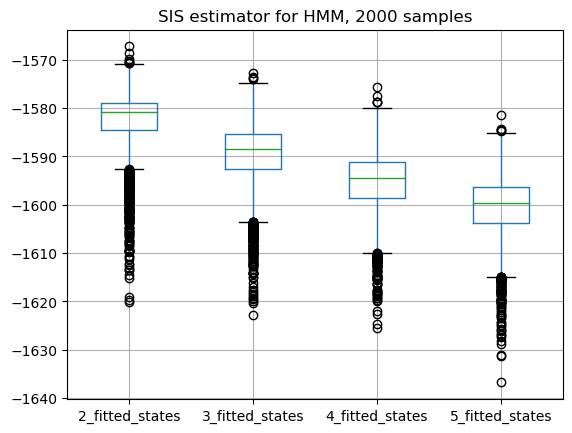

In [23]:
out_df.boxplot()
plt.title('SIS estimator for HMM, 2000 samples')

In [13]:
out+820

Array([ 3.97735596e+00,  8.77282715e+00, -4.80865479e+00,  7.48254395e+00,
        7.75677490e+00,  7.62329102e+00,  8.65252686e+00,  7.13665771e+00,
        1.20651855e+01,  6.02532959e+00, -4.83972168e+00,  9.73388672e+00,
        7.25415039e+00,  7.99420166e+00,  4.62481689e+00,  5.96466064e+00,
        1.07614746e+01,  8.46514893e+00,  1.49108887e-01,  1.08286743e+01,
        6.42590332e+00,  5.12854004e+00,  8.20190430e+00,  1.04464111e+01,
        1.58294678e+01,  1.35305786e+01, -3.08465576e+00,  9.56903076e+00,
        3.96044922e+00,  6.19787598e+00,  1.07755127e+01,  4.66693115e+00,
        9.37811279e+00,  4.68939209e+00,  8.61383057e+00,  2.40142822e+00,
        8.61370850e+00,  5.63427734e+00,  7.07281494e+00,  4.96856689e+00,
        2.52899170e+00,  6.57366943e+00,  9.49835205e+00,  6.05877686e+00,
        6.49328613e+00,  5.73089600e+00,  4.91784668e+00,  1.27313232e+00,
       -6.73278809e-01,  4.37756348e+00,  7.42419434e+00,  5.40490723e+00,
       -1.87561035e-01,  

(array([ 3.,  1.,  2.,  0.,  0.,  0.,  4.,  3.,  2.,  3.,  3.,  2.,  3.,
         3.,  4., 10.,  8., 13., 15., 23., 27., 12., 21., 25., 26., 32.,
        39., 34., 56., 61., 74., 66., 61., 63., 66., 63., 46., 42., 24.,
        19., 15., 11.,  4.,  4.,  3.,  1.,  2.,  0.,  0.,  1.]),
 array([-832.14727783, -831.54376221, -830.94024658, -830.33666992,
        -829.7331543 , -829.12963867, -828.52612305, -827.92260742,
        -827.3190918 , -826.71551514, -826.11199951, -825.50848389,
        -824.90496826, -824.30145264, -823.69787598, -823.09436035,
        -822.49084473, -821.8873291 , -821.28381348, -820.68029785,
        -820.07672119, -819.47320557, -818.86968994, -818.26617432,
        -817.66265869, -817.05908203, -816.45556641, -815.85205078,
        -815.24853516, -814.64501953, -814.04150391, -813.43792725,
        -812.83441162, -812.230896  , -811.62738037, -811.02386475,
        -810.42034912, -809.81677246, -809.21325684, -808.60974121,
        -808.00622559, -807.40270996

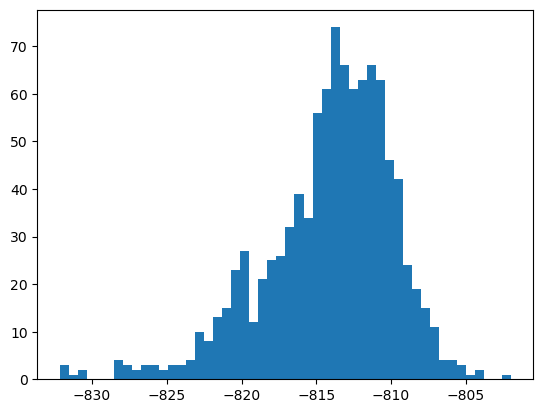

In [16]:
import matplotlib.pyplot as plt
plt.hist(out, bins=50)

In [36]:
def log_gamma_coefficient_hmm(prev_latent,
                              partial_obs_old,
                              partial_obs_new,
                              latent_bool_arr_old,
                              latent_bool_arr_new,
                              num_bins,
                              num_states,
                              num_obs,
                              bin_weight_prior_par,
                              latent_prior_par):
    """
    Computes the log_gamma coefficient

    Parameters
    ----------
    partial_obs : jnp.array of shape (num_obs, ), includes the current observation, with -1 for "unseen" observations
    latents_bool_arr : jnp.array of shape (num_states, num_obs), with 1 at (state,obs_idx) if the state is active at that obs_idx
    num_bins : int, number of bins for the observations
    num_states : int, number of states
    bin_weight_prior_par : float, prior parameter for the bin weights
    latent_prior_par : float, prior parameter for the latent weights
    """
    log_evidence_old = baseline_log_evidence_hmm(partial_obs_old, latent_bool_arr_old, num_states,num_bins, bin_weight_prior_par) # TODO: Modify this function, to do across states
    log_evidence_new = baseline_log_evidence_hmm(partial_obs_new, latent_bool_arr_new, num_states,num_bins, bin_weight_prior_par)
    log_posterior_latent_weight = jnp.log(
        post_latent_weight_hmm(latent_bool_arr_old, num_states,num_obs, latent_prior_par, start_state=prev_latent)
        )
    log_evidence_ratio = log_evidence_new - log_evidence_old # Ratio of m(C_k)) quantities in Hairault et al.
    # Vector of length num_states, with log_gamma_k for each state

    return log_evidence_ratio + log_posterior_latent_weight # log gamma_k in Hairault et al.


@partial(jit, static_argnums=(2,3))
def baseline_log_evidence_hmm(obs,latent_bool_arr, num_states, num_bins, bin_weight_prior_par):
    """
    Calculate the "baseline log evidence" for an HMM.
    For given observations, calculates the joint likelihood of these given a shared latent state.
    Amounts to taking the log ratio of posterior and prior normalising constants.

    Args:
        TBC

    Returns:
        jnp.array: Log evidence.
    """
    stacked_obs = jnp.multiply(1+obs, latent_bool_arr) - 1
    bin_counts_all = multi_bincount(stacked_obs, length=num_bins+1) # Includes "-1" values
    bin_counts = lax.dynamic_slice(bin_counts_all,(0,1),(num_states,num_bins))

    bin_weight_posterior_par = bin_weight_prior_par + bin_counts
    log_evidence = (jnp.sum(lax.lgamma(bin_weight_posterior_par),axis=1) - lax.lgamma(jnp.sum(bin_weight_posterior_par,axis=1))
                    + lax.lgamma(jnp.sum(bin_weight_prior_par,axis=1)) - jnp.sum(lax.lgamma(bin_weight_prior_par),axis=1)
                    )
    return log_evidence

@partial(jit,static_argnums=(1,2))
def post_latent_weight_hmm(latent_bool_arr, num_states,num_obs, latent_prior_par, start_state):
    """
    Calculate the posterior latent weight for an HMM.

    Args:
        state (int): State index.
        latents (jnp.ndarray): Latent states.
        num_states (int): Number of states.
        latent_prior_par (float): Latent prior parameter.
        start_state (int): Start state index.

    Returns:
        float: Posterior latent weight.
    """ 
    transition_counts_from_start_state = transition_count(latent_bool_arr=latent_bool_arr, num_states=num_states,num_obs=num_obs)[start_state,]
    latent_post_par = latent_prior_par + transition_counts_from_start_state
    return latent_post_par / jnp.sum(latent_post_par)


@partial(jit, static_argnums=(1,2))
def transition_count(latent_bool_arr, num_states, num_obs):
    start_states = lax.dynamic_slice( latent_bool_arr, (0,0), (num_states,num_obs-1) )
    end_states = lax.dynamic_slice( jnp.roll(latent_bool_arr,-1,axis=1), (0,0), (num_states,num_obs-1) )
    transition_count_mat = jnp.matmul ( start_states, jnp.transpose(end_states) )
    return transition_count_mat


@partial(jax.jit, static_argnums=(1,))
def multi_bincount(arr,length):
    return jax.vmap(partial( jax.numpy.bincount, length=length))(jnp.int16(arr))

In [37]:
def sis_estimator_hmm(obs,
                      iters,
                      num_bins,
                      num_states,
                      single_bin_weight_prior=1.,
                      single_latent_weight_prior=1.,
                      seed=0):
    
    def scan_body(carry, obs_datum): # Used for scan across observations within sis iter
        log_evidence_weights, partial_obs_old, key, prev_latent, latent_bool_arr_old, data_idx = carry
        partial_obs_new = partial_obs_old.at[data_idx].set(obs_datum)
        latent_bool_arr_ones = latent_bool_arr_old.at[:,data_idx].set(1)
        log_gamma = log_gamma_coefficient_hmm(prev_latent,
                                              partial_obs_old,
                                              partial_obs_new,
                                              latent_bool_arr_old=latent_bool_arr_old,
                                              latent_bool_arr_new=latent_bool_arr_ones,
                                              num_bins=num_bins,
                                              num_states=num_states,
                                              num_obs=num_obs,
                                              bin_weight_prior_par=bin_weight_prior_par,
                                              latent_prior_par=latent_prior_par)
        
        key, subkey = random.split(key)
        new_latent = random.categorical(key=subkey, logits=log_gamma)
        latent_bool_arr_new = latent_bool_arr_old.at[new_latent,data_idx].set(1)
        new_log_evidence_weights = log_evidence_weights + jax.scipy.special.logsumexp(log_gamma)
        return (new_log_evidence_weights, partial_obs_new, key, new_latent, latent_bool_arr_new, data_idx+1), None

    bin_weight_prior_par = jnp.repeat(single_bin_weight_prior,num_bins*num_states).reshape(num_states,num_bins)
    latent_prior_par = jnp.repeat(single_latent_weight_prior,num_states**2).reshape(num_states,num_states)
    num_obs = obs.shape[0]

    def single_sis_iter(key): # Single iteration over which to vmap
        latent_bool_arr = jnp.zeros((num_states,num_obs), dtype=jnp.float16)
        init_state = random.categorical(key, logits=jnp.log(latent_prior_par))
        latent_bool_arr = latent_bool_arr.at[init_state,0].set(1)
        partial_obs = -jnp.ones_like(obs, dtype=jnp.float16)
        partial_obs = partial_obs.at[0].set(obs[0])
        init_log_evidence_weight = baseline_log_evidence_hmm(partial_obs, latent_bool_arr, num_states, num_bins, bin_weight_prior_par)
        key = random.PRNGKey(seed)
        init_carry = (init_log_evidence_weight, partial_obs, key,init_state, latent_bool_arr , 1)
        final_carry, _ = lax.scan(scan_body, init_carry, jax.lax.dynamic_slice_in_dim(obs, 1, num_obs-1, axis=0) )
        log_evidence_weight = final_carry[0]
        return log_evidence_weight

    key = random.PRNGKey(seed)
    keys = random.split(key, iters)
    log_evidence_weights = vmap(single_sis_iter)(keys)
    return {'evidence': log_evidence_weights }

In [176]:
def sis_estimator_hmm(obs,
                      iters,
                      num_bins,
                      num_states,
                      single_bin_weight_prior=1.,
                      single_latent_weight_prior=1.,
                      seed=0):
    
    assert jnp.max(obs) <= num_bins - 1 , "Obs should be in range 0 to num_bins-1 inclusive"
    
    def scan_body(carry, obs_datum): # Used for scan across observations within sis iter
        log_evidence_weights, partial_obs_old, key, prev_latent, latent_bool_arr_old, data_idx = carry
        partial_obs_new = partial_obs_old.at[data_idx].set(obs_datum)
        latent_bool_arr_ones = latent_bool_arr_old.at[:,data_idx].set(1)
        log_gamma = log_gamma_coefficient_hmm(prev_latent,
                                              partial_obs_old,
                                              partial_obs_new,
                                              latent_bool_arr_old=latent_bool_arr_old,
                                              latent_bool_arr_new=latent_bool_arr_ones,
                                              num_bins=num_bins,
                                              num_states=num_states,
                                              num_obs=num_obs,
                                              bin_weight_prior_par=bin_weight_prior_par,
                                              latent_prior_par=latent_prior_par)
        
        key, subkey = random.split(key)
        new_latent = random.categorical(key=subkey, logits=log_gamma)
        latent_bool_arr_new = latent_bool_arr_old.at[new_latent,data_idx].set(1)
        new_log_evidence_weights = log_evidence_weights + jax.scipy.special.logsumexp(log_gamma)
        return (new_log_evidence_weights, partial_obs_new, key, new_latent, latent_bool_arr_new, data_idx+1), None

    bin_weight_prior_par = jnp.repeat(single_bin_weight_prior,num_bins*num_states).reshape(num_states,num_bins)
    latent_prior_par = jnp.repeat(single_latent_weight_prior,num_states**2).reshape(num_states,num_states)
    num_obs = obs.shape[0]

    def single_sis_iter(key): # Single iteration over which to vmap
        latent_bool_arr = jnp.zeros((num_states,num_obs), dtype=jnp.float16)
        init_state = random.categorical(key, logits=jnp.log(latent_prior_par[1,:]))
        latent_bool_arr = latent_bool_arr.at[init_state,0].set(1)
        partial_obs = -jnp.ones_like(obs, dtype=jnp.float16)
        partial_obs = partial_obs.at[0].set(obs[0])
        init_log_evidence_weight = baseline_log_evidence_hmm(partial_obs, latent_bool_arr, num_states, num_bins, bin_weight_prior_par)[init_state]
        init_carry = (init_log_evidence_weight, partial_obs, key, init_state, latent_bool_arr , 1)
        final_carry, _ = lax.scan(scan_body, init_carry, jax.lax.dynamic_slice_in_dim(obs, 1, num_obs-1, axis=0) )
        log_evidence_weight = final_carry[0]
        return log_evidence_weight

    key = random.PRNGKey(seed)
    keys = random.split(key, iters)
    log_evidence_weights = vmap(single_sis_iter)(keys)
    return log_evidence_weights

def log_gamma_coefficient_hmm(prev_latent,
                              partial_obs_old,
                              partial_obs_new,
                              latent_bool_arr_old,
                              latent_bool_arr_new,
                              num_bins,
                              num_states,
                              num_obs,
                              bin_weight_prior_par,
                              latent_prior_par):
    """
    Computes the log_gamma coefficient

    Parameters
    ----------
    partial_obs : jnp.array of shape (num_obs, ), includes the current observation, with -1 for "unseen" observations
    latents_bool_arr : jnp.array of shape (num_states, num_obs), with 1 at (state,obs_idx) if the state is active at that obs_idx
    num_bins : int, number of bins for the observations
    num_states : int, number of states
    bin_weight_prior_par : float, prior parameter for the bin weights
    latent_prior_par : float, prior parameter for the latent weights
    """
    log_evidence_old = baseline_log_evidence_hmm(partial_obs_old, latent_bool_arr_old, num_states,num_bins, bin_weight_prior_par) # TODO: Modify this function, to do across states
    log_evidence_new = baseline_log_evidence_hmm(partial_obs_new, latent_bool_arr_new, num_states,num_bins, bin_weight_prior_par)
    log_posterior_latent_weight = jnp.log(
        post_latent_weight_hmm(latent_bool_arr_old, num_states,num_obs, latent_prior_par, start_state=prev_latent)
        )
    log_evidence_ratio = log_evidence_new - log_evidence_old # Ratio of m(C_k)) quantities in Hairault et al.
    # Vector of length num_states, with log_gamma_k for each state

    return log_evidence_ratio + log_posterior_latent_weight # log gamma_k in Hairault et al.


@partial(jit, static_argnums=(2,3))
def baseline_log_evidence_hmm(obs,latent_bool_arr, num_states, num_bins, bin_weight_prior_par):
    """
    Calculate the "baseline log evidence" for an HMM.
    For given observations, calculates the joint likelihood of these given a shared latent state.
    Amounts to taking the log ratio of posterior and prior normalising constants.

    Args:
        TBC

    Returns:
        jnp.array: Log evidence.
    """
    stacked_obs = jnp.multiply(1+obs, latent_bool_arr) - 1
    bin_counts_all = multi_bincount(stacked_obs, length=num_bins+1) # Includes "-1" values
    bin_counts = lax.dynamic_slice(bin_counts_all,(0,1),(num_states,num_bins))

    bin_weight_posterior_par = bin_weight_prior_par + bin_counts
    log_evidence = (jnp.sum(lax.lgamma(bin_weight_posterior_par),axis=1) - lax.lgamma(jnp.sum(bin_weight_posterior_par,axis=1))
                    + lax.lgamma(jnp.sum(bin_weight_prior_par,axis=1)) - jnp.sum(lax.lgamma(bin_weight_prior_par),axis=1)
                    )
    return log_evidence

@partial(jit,static_argnums=(1,2))
def post_latent_weight_hmm(latent_bool_arr, num_states,num_obs, latent_prior_par, start_state):
    """
    Calculate the posterior latent weight for an HMM.

    Args:
        state (int): State index.
        latents (jnp.ndarray): Latent states.
        num_states (int): Number of states.
        latent_prior_par (float): Latent prior parameter.
        start_state (int): Start state index.

    Returns:
        float: Posterior latent weight.
    """ 
    transition_counts_from_start_state = transition_count(latent_bool_arr=latent_bool_arr, num_states=num_states,num_obs=num_obs)[start_state,]
    latent_post_par = latent_prior_par[start_state,] + transition_counts_from_start_state
    return latent_post_par / jnp.sum(latent_post_par)


@partial(jit, static_argnums=(1,2))
def transition_count(latent_bool_arr, num_states, num_obs):
    start_states = lax.dynamic_slice( latent_bool_arr, (0,0), (num_states,num_obs-1) )
    end_states = lax.dynamic_slice( jnp.roll(latent_bool_arr,-1,axis=1), (0,0), (num_states,num_obs-1) )
    transition_count_mat = jnp.matmul ( start_states, jnp.transpose(end_states) )
    return transition_count_mat


@partial(jax.jit, static_argnums=(1,))
def multi_bincount(arr,length):
    return jax.vmap(partial( jax.numpy.bincount, length=length))(jnp.int16(arr))

In [173]:
obs_data.shape

(1000,)

In [205]:
test_out = sis_estimator_hmm(obs=obs_data[0:2000], iters=1000, num_bins=4, num_states=3, seed=0)

In [194]:
def sis_estimator_hmm(obs,
                      iters,
                      num_bins,
                      num_states,
                      single_bin_weight_prior=1.,
                      single_latent_weight_prior=1.,
                      seed=0):
    """
    Implements the Sequential Importance Sampling (SIS) estimator for the marginal likelihood
    in a discrete HIdden Markov Model (HMM)
    (Hairault et al. 2022 https://arxiv.org/abs/2205.05416)
    
    Parameters
    ----------
    obs : array_like
        The observations from the HMM.
    iters : int
        The number of iterations to perform.
    num_bins : int
        The number of bins for the observations.
    num_states : int
        The number of states in the HMM.
    single_bin_weight_prior : float, optional
        The prior weight for each bin. Default is 1.
    single_latent_weight_prior : float, optional
        The prior weight for each latent state. Default is 1.
    seed : int, optional
        The seed for the random number generator. Default is 0.
        
    Returns
    -------
    log_evidence_weights : array_like, shape (iters,)
        The estimated log evidence from the SIS, one for each iteration.
    """
    def scan_body(carry, obs_datum): # Used for scan across observations within sis iter
        log_evidence_weights, partial_obs_old, key, prev_latent, latent_bool_arr_old, data_idx = carry
        partial_obs_new = partial_obs_old.at[data_idx].set(obs_datum)
        latent_bool_arr_ones = latent_bool_arr_old.at[:,data_idx].set(1)
        log_gamma = log_gamma_coefficient_hmm(prev_latent,
                                              partial_obs_old,
                                              partial_obs_new,
                                              latent_bool_arr_old=latent_bool_arr_old,
                                              latent_bool_arr_new=latent_bool_arr_ones,
                                              num_bins=num_bins,
                                              num_states=num_states,
                                              num_obs=num_obs,
                                              bin_weight_prior_par=bin_weight_prior_par,
                                              latent_prior_par=latent_prior_par)
        
        key, subkey = random.split(key)
        new_latent = random.categorical(key=subkey, logits=log_gamma)
        latent_bool_arr_new = latent_bool_arr_old.at[new_latent,data_idx].set(1)
        new_log_evidence_weights = log_evidence_weights + jax.scipy.special.logsumexp(log_gamma)
        return (new_log_evidence_weights, partial_obs_new, key, new_latent, latent_bool_arr_new, data_idx+1), None

    bin_weight_prior_par = jnp.repeat(single_bin_weight_prior,num_bins*num_states).reshape(num_states,num_bins)
    latent_prior_par = jnp.repeat(single_latent_weight_prior,num_states**2).reshape(num_states,num_states)
    num_obs = obs.shape[0]

    def single_sis_iter(key): # Single iteration over which to vmap
        latent_bool_arr = jnp.zeros((num_states,num_obs), dtype=jnp.float16)
        init_state = random.categorical(key, logits=jnp.log(latent_prior_par[1,:]))
        latent_bool_arr = latent_bool_arr.at[init_state,0].set(1)
        partial_obs = -jnp.ones_like(obs, dtype=jnp.float16)
        partial_obs = partial_obs.at[0].set(obs[0])
        init_log_evidence_weight = baseline_log_evidence_hmm(partial_obs, latent_bool_arr, num_states, num_bins, bin_weight_prior_par)[init_state]
        init_carry = (init_log_evidence_weight, partial_obs, key, init_state, latent_bool_arr , 1)
        final_carry, _ = lax.scan(scan_body, init_carry, jax.lax.dynamic_slice_in_dim(obs, 1, num_obs-1, axis=0) )
        log_evidence_weight = final_carry[0]
        return log_evidence_weight

    key = random.PRNGKey(seed)
    keys = random.split(key, iters)
    log_evidence_weights = vmap(single_sis_iter)(keys)
    return log_evidence_weights

def log_gamma_coefficient_hmm(prev_latent,
                              partial_obs_old,
                              partial_obs_new,
                              latent_bool_arr_old,
                              latent_bool_arr_new,
                              num_bins,
                              num_states,
                              num_obs,
                              bin_weight_prior_par,
                              latent_prior_par):
    """
    Computes the log gamma coefficient for a Hidden Markov Model (HMM).
    
    Parameters
    ----------
    prev_latent : array_like
        The previous latent states.
    partial_obs_old : array_like
        The old partial observations.
    partial_obs_new : array_like
        The new partial observations.
    latent_bool_arr_old : array_like
        The old boolean array of latents (the reference)
    latent_bool_arr_new : array_like
        The new boolean array of latents (the 'proposal')
    num_bins : int
        The number of bins for the observations.
    num_states : int
        The number of states in the HMM.
    num_obs : int
        The number of observations.
    bin_weight_prior_par : float
        The prior parameter for the bin weights.
    latent_prior_par : float
        The prior parameter for the latent weights.
        
    Returns
    -------
    log_gamma : array_like
        The log gamma coefficient.
    """
    log_evidence_old = baseline_log_evidence_hmm(partial_obs_old, latent_bool_arr_old, num_states,num_bins, bin_weight_prior_par) # TODO: Modify this function, to do across states
    log_evidence_new = baseline_log_evidence_hmm(partial_obs_new, latent_bool_arr_new, num_states,num_bins, bin_weight_prior_par)
    log_posterior_latent_weight = jnp.log(
        post_latent_weight_hmm(latent_bool_arr_old, num_states,num_obs, latent_prior_par, start_state=prev_latent)
        )
    log_evidence_ratio = log_evidence_new - log_evidence_old # Ratio of m(C_k)) quantities in Hairault et al.
    # Vector of length num_states, with log_gamma_k for each state

    return log_evidence_ratio + log_posterior_latent_weight # log gamma_k in Hairault et al.


@partial(jit, static_argnums=(2,3))
def baseline_log_evidence_hmm(obs,latent_bool_arr, num_states, num_bins, bin_weight_prior_par):
    """
    Calculate the "baseline log evidence" for an HMM.
    
    Parameters
    ----------
    obs : array_like
        The observations.
    latent_bool_arr : array_like
        Boolean array indicating the latent state for each observation.
    num_states : int
        The number of states in the HMM.
    num_bins : int
        The number of bins for the observations.
    bin_weight_prior_par : float
        The prior parameter for the bin weights.
        
    Returns
    -------
    log_evidence : array_like
        The baseline log evidence - vector of m(C_k) as in Hairault et al. (2022)
    """
    stacked_obs = jnp.multiply(1+obs, latent_bool_arr) - 1
    bin_counts_all = multi_bincount(stacked_obs, length=num_bins+1) # Includes "-1" values
    bin_counts = lax.dynamic_slice(bin_counts_all,(0,1),(num_states,num_bins))

    bin_weight_posterior_par = bin_weight_prior_par + bin_counts
    log_evidence = (jnp.sum(lax.lgamma(bin_weight_posterior_par),axis=1) - lax.lgamma(jnp.sum(bin_weight_posterior_par,axis=1))
                    + lax.lgamma(jnp.sum(bin_weight_prior_par,axis=1)) - jnp.sum(lax.lgamma(bin_weight_prior_par),axis=1)
                    )
    return log_evidence

@partial(jit,static_argnums=(1,2))
def post_latent_weight_hmm(latent_bool_arr, num_states,num_obs, latent_prior_par, start_state):
    """
    Calculate the posterior latent weight for an HMM.
    Uses Dirichlet conjugacy to update parameter based on observed transitions.
    
    Parameters
    ----------
    latent_bool_arr : array_like
        Boolean array indicating the latent state for each observation.
    num_states : int
        The number of states in the HMM.
    num_obs : int
        The number of observations.
    latent_prior_par : float
        The prior parameter for the latent weights.
    start_state : int
        The initial state.
        
    Returns
    -------
    float
        The posterior latent weight.
    """ 
    transition_counts_from_start_state = transition_count(latent_bool_arr=latent_bool_arr, num_states=num_states,num_obs=num_obs)[start_state,]
    latent_post_par = latent_prior_par[start_state,] + transition_counts_from_start_state
    return latent_post_par / jnp.sum(latent_post_par)


@partial(jit, static_argnums=(1,2))
def transition_count(latent_bool_arr, num_states, num_obs):
    """
    Compute the transition count for a sequence of latent states.
    
    Parameters
    ----------
    latent_bool_arr : array_like
        Boolean array indicating the latent state for each observation.
    num_states : int
        The number of states in the HMM.
    num_obs : int
        The number of observations.
        
    Returns
    -------
    transition_count_mat : array_like
        The transition count matrix.
    """
    start_states = lax.dynamic_slice( latent_bool_arr, (0,0), (num_states,num_obs-1) )
    end_states = lax.dynamic_slice( jnp.roll(latent_bool_arr,-1,axis=1), (0,0), (num_states,num_obs-1) )
    transition_count_mat = jnp.matmul ( start_states, jnp.transpose(end_states) )
    return transition_count_mat


@partial(jax.jit, static_argnums=(1,))
def multi_bincount(arr,length):
    """
    Compute the bincount for each row of an array.
    Used to compute the bincounts for each latent state in parallel.
    
    Parameters
    ----------
    arr : array_like
        The array to compute the bincount for.
    length : int
        The number of bins.
        
    Returns
    -------
    bincount : array_like
        The bincount for each row of the array.
    """
    return jax.vmap(partial( jax.numpy.bincount, length=length))(jnp.int16(arr))

In [213]:
partial_means = []
for i in range(len(out)):
    partial_mean = log_exponential_mean(out[0:i+1])
    partial_means.append(partial_mean)

In [190]:
out

Array([-7798.8633, -7825.1797, -7829.2803, -7812.571 , -7807.91  ,
       -7830.787 , -7807.5015, -7812.004 , -7802.4644, -7819.636 ,
       -7836.4805, -7823.736 , -7809.083 , -7810.7744, -7806.922 ,
       -7827.3276, -7858.859 , -7823.4775, -7834.932 , -7811.257 ,
       -7816.4185, -7792.9385, -7835.907 , -7805.2134, -7796.6235,
       -7794.2   , -7851.8687, -7820.1904, -7840.6455, -7817.174 ,
       -7789.459 , -7825.143 , -7830.9917, -7828.6064, -7810.507 ,
       -7824.2695, -7804.842 , -7808.266 , -7816.772 , -7824.8354,
       -7829.0264, -7815.9263, -7810.8887, -7812.7617, -7820.1   ,
       -7813.552 , -7830.675 , -7825.6016, -7862.604 , -7829.2305,
       -7800.457 , -7808.524 , -7853.571 , -7807.7896, -7820.835 ,
       -7814.0044, -7829.5415, -7808.125 , -7801.339 , -7851.0996,
       -7813.78  , -7822.415 , -7854.561 , -7829.9854, -7802.688 ,
       -7828.1284, -7822.7   , -7833.0386, -7793.154 , -7798.308 ,
       -7822.979 , -7821.221 , -7808.592 , -7829.3774, -7836.2

In [191]:
jax.scipy.special.logsumexp(out) - jnp.log(10000)

Array(-7783.2036, dtype=float32)

(array([2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 3.000e+00,
        2.000e+00, 6.000e+00, 4.000e+00, 4.000e+00, 6.000e+00, 7.000e+00,
        8.000e+00, 7.000e+00, 2.000e+01, 1.400e+01, 1.400e+01, 2.400e+01,
        3.200e+01, 3.800e+01, 4.700e+01, 4.400e+01, 5.200e+01, 8.500e+01,
        9.900e+01, 1.120e+02, 1.270e+02, 1.790e+02, 2.080e+02, 2.680e+02,
        3.810e+02, 4.400e+02, 6.040e+02, 6.940e+02, 8.810e+02, 1.071e+03,
        1.394e+03, 1.373e+03, 9.060e+02, 4.580e+02, 2.210e+02, 1.330e+02,
        1.600e+01, 8.000e+00]),
 array([-628.47119141, -627.72058105, -626.97003174, -626.21948242,
        -625.46887207, -624.71826172, -623.9677124 , -623.21716309,
        -622.46655273, -621.71594238, -620.96539307, -620.21484375,
        -619.4642334 , -618.71362305, -617.96307373, -617.21252441,
        -616.46191406, -615.71130371, -614.96075439, -614.21020508,
        -613.45959473, -612.70898438

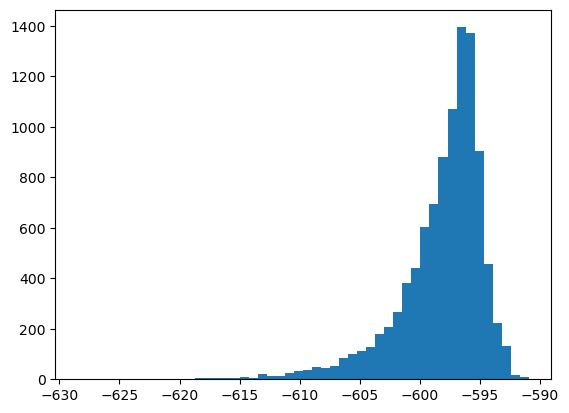

In [151]:
import matplotlib.pyplot as plt
plt.hist(out, bins = 50)

In [74]:
out[0][1]

Array([-1.3862945, -1.3862945], dtype=float32)

In [9]:
obs = jnp.array([2,3,3,4,3,0,1,0,0,1,2,2,0,1,1,-1,-1,-1,-1,-1])

In [13]:
latent_bool_arr = jnp.zeros((2,20), dtype=jnp.float16)
k=0
for i in range(15):
    k = 1-k
    latent_bool_arr = latent_bool_arr.at[k,i].set(1)

In [20]:
fil_obs = (jnp.multiply(1+obs, latent_bool_arr) - 1)

In [34]:
fil_obs.shape

(2, 20)

In [ ]:
from functools import partial

In [54]:
jnp.sum(x,axis=1)

Array([4., 4., 4.], dtype=float32)

In [107]:
obs_old

Array([ 2,  3,  3,  4,  3,  0,  1,  0,  0,  1,  2,  2,  0,  1,  1, -1, -1,
       -1, -1, -1], dtype=int32)

In [106]:
obs_new

Array([ 2,  3,  3,  4,  3,  0,  1,  0,  0,  1,  2,  2,  0,  1,  1,  2, -1,
       -1, -1, -1], dtype=int32)

To do: adjust the latent_bool_arr input for the obs_new so it can pick out the new thing. essentially need to make that whole column equal to ones to calculate the evidence as if that becomes the state

In [105]:
baseline_log_evidence_hmm(obs_old,latent_bool_arr,2,5,jnp.ones((2,5),dtype=jnp.float16))

Array([-8.93, -9.84], dtype=float16)

In [96]:
@partial(jit, static_argnums=(2,3))
def baseline_log_evidence_hmm(obs,latent_bool_arr, num_states, num_bins, bin_weight_prior_par):
    """
    Calculate the "baseline log evidence" for an HMM.
    For given observations, calculates the joint likelihood of these given a shared latent state.
    Amounts to taking the log ratio of posterior and prior normalising constants.

    Args:
        obs (jnp.ndarray): Observations.
        num_bins (int): Number of bins.

    Returns:
        float: Log evidence.
    """
    stacked_obs = jnp.multiply(1+obs, latent_bool_arr) - 1
    bin_counts_all = multi_bincount(stacked_obs, length=num_bins+1) # Includes "-1" values
    bin_counts = lax.dynamic_slice(bin_counts_all,(0,1),(num_states,num_bins))

    bin_weight_posterior_par = bin_weight_prior_par + bin_counts
    log_evidence = (jnp.sum(lax.lgamma(bin_weight_posterior_par),axis=1) - lax.lgamma(jnp.sum(bin_weight_posterior_par,axis=1))
                    + lax.lgamma(jnp.sum(bin_weight_prior_par,axis=1)) - jnp.sum(lax.lgamma(bin_weight_prior_par),axis=1)
                    )
    return log_evidence

@partial(jit,static_argnums=(2,3))
def post_latent_weight_hmm(latents, num_states, latent_prior_par, start_state):
    """
    Calculate the posterior latent weight for an HMM.

    Args:
        state (int): State index.
        latents (jnp.ndarray): Latent states.
        num_states (int): Number of states.
        latent_prior_par (float): Latent prior parameter.
        start_state (int): Start state index.

    Returns:
        float: Posterior latent weight.
    """ 
    transition_counts_from_start_state = transition_count(latent_states=latents, num_states=num_states)[start_state,]
    latent_post_par = latent_prior_par + transition_counts_from_start_state
    return latent_post_par / jnp.sum(latent_post_par)

@jit
def transition_count(latent_states, num_states):
    transition_count_mat = jnp.array([
    jnp.bincount(latent_states[:-1] * num_states + latent_states[1:],
                 length=num_states * num_states)]).reshape(num_states, num_states)
    return transition_count_mat

In [124]:
states

Array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int32)

In [8]:
latent_bool_arr_test = jnp.array([[1, 0, 1,0],
                             [0, 1, 0,0],
                             [0, 0, 0,1]])


In [134]:
jnp.roll(latent_bool_arr_test,-1,axis=1)

Array([[0, 1, 1],
       [1, 0, 0],
       [0, 0, 0]], dtype=int32)

In [137]:
jnp.roll(latent_bool_arr_test,-1,axis=1)[:,:-1]

Array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=int32)

In [140]:
latent_bool_arr_test

Array([[1, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]], dtype=int32)

In [138]:
latent_bool_arr_test.shape

(3, 4)

In [5]:
test_roller = jnp.array([1,2,3,4,5,6,7,8,9,10]).reshape(2,5)

In [7]:
test_roller

Array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]], dtype=int32)

In [6]:
jnp.roll(test_roller,-1,axis=1)

Array([[ 2,  3,  4,  5,  1],
       [ 7,  8,  9, 10,  6]], dtype=int32)

Array([[0, 1, 1],
       [1, 0, 0],
       [0, 0, 0]], dtype=int32)

In [9]:
latent_bool_arr_test

Array([[1, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]], dtype=int32)

In [149]:
latent_bool_arr_test = jnp.array([[1, 0, 1],[0,1,0],[0,0,0]])
jnp.matmul ( jnp.roll(latent_bool_arr_test,-1,axis=1), jnp.transpose(latent_bool_arr_test) )

Array([[1, 1, 0],
       [1, 0, 0],
       [0, 0, 0]], dtype=int32)

In [128]:
jnp.matmul ( jnp.roll(latent_bool_arr,-1,axis=1), jnp.transpose(latent_bool_arr) )

Array([[0., 7.],
       [7., 0.]], dtype=float16)

In [123]:
states = jnp.argmax(latent_bool_arr, axis=0)

In [111]:
x.at[:,2].set(2)

Array([[1., 1., 2., 1.],
       [1., 1., 2., 1.],
       [1., 1., 2., 1.]], dtype=float32)

In [120]:
def log_gamma_coefficient_hmm(prev_latent,
                              partial_obs_old,
                              partial_obs_new,
                              latents_bool_arr_old,
                              latents_bool_arr_new,
                              num_bins,num_states,
                              bin_weight_prior_par,
                              latent_prior_par):
    """
    Computes the log_gamma coefficient

    Parameters
    ----------
    partial_obs : jnp.array of shape (num_obs, ), includes the current observation, with -1 for "unseen" observations
    latents_bool_arr : jnp.array of shape (num_states, num_obs), with 1 at (state,obs_idx) if the state is active at that obs_idx
    num_bins : int, number of bins for the observations
    num_states : int, number of states
    bin_weight_prior_par : float, prior parameter for the bin weights
    latent_prior_par : float, prior parameter for the latent weights
    """
    log_evidence_old = baseline_log_evidence_hmm(partial_obs_old, latents_bool_arr_old, num_states,num_bins, bin_weight_prior_par) # TODO: Modify this function, to do across states
    log_evidence_new = baseline_log_evidence_hmm(partial_obs_new, latents_bool_arr_new, num_states,num_bins, bin_weight_prior_par)
    #log_posterior_latent_weight = jnp.log( # TODO: Modify this, make it across all states
    #    post_latent_weight_hmm(latent_bool_arr,num_states, latent_prior_par, start_state=prev_latent)
    #    )
    log_evidence_ratio = log_evidence_new - log_evidence_old # Ratio of m(C_k)) quantities in Hairault et al.
    # Vector of length num_states, with log_gamma_k for each state

    return log_evidence_ratio #+ log_posterior_latent_weight # log gamma_k in Hairault et al.

In [103]:
obs_new

Array([ 2,  3,  3,  4,  3,  0,  1,  0,  0,  1,  2,  2,  0,  1,  1,  2, -1,
       -1, -1, -1], dtype=int32)

In [118]:
latent_bool_arr.at[:,15].set(1)

Array([[0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 0., 0., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
        0., 0., 0., 0.]], dtype=float16)

In [119]:
baseline_log_evidence_hmm(obs_new, latent_bool_arr=latent_bool_arr.at[:,15].set(1), num_states=2,num_bins=5, bin_weight_prior_par=jnp.ones((2,5),dtype=jnp.float16))

Array([-10.54, -11.14], dtype=float16)

In [117]:
baseline_log_evidence_hmm(obs_old, latent_bool_arr, num_states=2,num_bins=5, bin_weight_prior_par=jnp.ones((2,5),dtype=jnp.float16))

Array([-8.93, -9.84], dtype=float16)

In [122]:
out

Array([-1.609, -1.297], dtype=float16)

In [121]:
out = log_gamma_coefficient_hmm(prev_latent=1,
                          partial_obs_old=obs_old,
                          partial_obs_new=obs_new,
                          latents_bool_arr_old=latent_bool_arr,
                          latents_bool_arr_new=latent_bool_arr.at[:,15].set(1),
                          num_bins=5,
                          num_states=2,
                          bin_weight_prior_par = jnp.ones((2,5),dtype=jnp.float16),
                          latent_prior_par = jnp.ones((2,2),dtype=jnp.float16))

In [86]:
obs_old = obs
obs_new = obs.at[15].set(2)

In [144]:
jnp.sum(my_arr.at[init_state,1].set(1), axis=0) # axis = 0 is col sums, axis = 1 is row sums

Array([0., 1., 0.], dtype=float32)

In [137]:
init_state = random.categorical(random.PRNGKey(0), logits=jnp.array([1.,2.,3.]))

In [139]:
my_arr.at[init_state,1].set(1)

Array([[0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [138]:
my_arr = jnp.zeros((3,3), dtype=jnp.float32)

In [16]:
def sis_estimator_hmm(obs,
                      num_bins,
                      iters,
                      num_hidden_states,
                      single_bin_weight_prior=1.,
                      single_latent_weight_prior=1.,
                      seed=0):
    
    def scan_body(carry, obs_datum): # Used for scan across observations within sis iter
        key, latents, log_evidence_weights, data_idx = carry
        # def gamma_body(state, log_gamma_accumulated): # Used to compute the gamma across states
        #     log_gamma_val = log_gamma_coefficient_hmm(data_idx, state, obs, latents[:data_idx],
        #                                       num_bins, num_hidden_states, bin_weight_prior_par,
        #                                       latent_prior_par)
        #     return log_gamma_accumulated.at[state].set(log_gamma_val)

        # log_gamma = jax.lax.fori_loop(lower=0,upper=num_hidden_states,
        #                           body_fun=gamma_body,
        #                           init_val=jnp.ones(num_hidden_states,dtype=jnp.float32))
        
        # Function to compute log_gamma for a single state
        new_obs = obs.at[data_idx].set(obs_datum)
        def log_gamma_for_state(state):
            return log_gamma_coefficient_hmm(data_idx, state, obs, latents[:data_idx],
                                             num_bins, num_hidden_states, bin_weight_prior_par,
                                             latent_prior_par)

        # Use vmap to compute log_gamma for all states in parallel
        log_gamma = vmap(log_gamma_for_state)(jnp.arange(num_hidden_states))
        
        key, subkey = random.split(key)
        new_latent = random.categorical(key=subkey, logits=log_gamma)
        new_latents = latents.at[data_idx].set(new_latent)
        new_log_evidence_weights = log_evidence_weights + jax.scipy.special.logsumexp(log_gamma)
        return (key, new_latents, new_log_evidence_weights, 1+ data_idx), None

    bin_weight_prior_par = jnp.repeat(single_bin_weight_prior,num_bins)
    latent_prior_par = jnp.repeat(single_latent_weight_prior,num_hidden_states)
    num_obs = obs.shape[0]

    def single_sis_iter(key): # Single iteration over which to vmap
        latents = - jnp.ones(num_obs, dtype=jnp.float32)
        latents = latents.at[0].set(random.categorical(key, logits=jnp.log(latent_prior_par)))
        init_log_evidence_weight = baseline_log_evidence_hmm(obs, latents, num_bins, bin_weight_prior_par)
        key = random.PRNGKey(seed)

        init_carry = (key, latents, init_log_evidence_weight, 1)
        final_carry, _ = lax.scan(scan_body, init_carry, jax.lax.dynamic_slice_in_dim(obs, 1, num_obs-1, axis=0))
        log_evidence_weight = final_carry[2]
        return log_evidence_weight

    key = random.PRNGKey(seed)
    keys = random.split(key, iters)
    log_evidence_weights = vmap(single_sis_iter)(keys)
    return {'evidence': log_evidence_weights }


def log_gamma_coefficient_hmm(idx, state, obs, latents, num_bins, num_states, bin_weight_prior_par, latent_prior_par):
    assert idx <= (len(latents) + 1)
    assert idx >= 1
    
    state_filter = latents[:idx - 1] == state
    obs_up_to_idx = obs[:idx - 1]
    prev_state_obs = obs_up_to_idx[state_filter] # Prev. obs associated to given state
    new_state_obs = jnp.concatenate([prev_state_obs, jnp.array([obs[idx]])]) # Include new obs in state to calc prob.

    log_evidence_new = baseline_log_evidence_hmm(new_state_obs, num_bins, bin_weight_prior_par)
    log_evidence_prev = baseline_log_evidence_hmm(prev_state_obs, num_bins, bin_weight_prior_par)
    log_posterior_latent_weight = jnp.log(
        post_latent_weight_hmm(state, latents[:idx-1], num_states, latent_prior_par, start_state=latents[idx-1])
        )
    log_evidence_ratio = log_evidence_new - log_evidence_prev # Ratio of m(C_k)) quantities in Hairault et al.

    return log_evidence_ratio + log_posterior_latent_weight # log gamma_k in Hairault et al.


def baseline_log_evidence_hmm(obs, num_bins, bin_weight_prior_par):
    """
    Calculate the "baseline log evidence" for an HMM.
    For given observations, calculates the joint likelihood of these given a shared latent state.
    Amounts to taking the log ratio of posterior and prior normalising constants.

    Args:
        obs (jnp.ndarray): Observations.
        num_bins (int): Number of bins.
        bin_weight_prior_par (float): Bin weight prior parameter.

    Returns:
        float: Log evidence.
    """
    if obs.shape[0] == 0:
        return 0

    bin_counts = jnp.bincount(obs, length=num_bins)
    bin_weight_posterior_par = bin_weight_prior_par + bin_counts
    log_evidence = (jnp.sum(lax.lgamma(bin_weight_posterior_par)) - lax.lgamma(jnp.sum(bin_weight_posterior_par))
                    + lax.lgamma(jnp.sum(bin_weight_prior_par)) - jnp.sum(lax.lgamma(bin_weight_prior_par))
                    )
    return log_evidence

def post_latent_weight_hmm(state, latents, num_states, latent_prior_par, start_state):
    """
    Calculate the posterior latent weight for an HMM.

    Args:
        state (int): State index.
        latents (jnp.ndarray): Latent states.
        num_states (int): Number of states.
        latent_prior_par (float): Latent prior parameter.
        start_state (int): Start state index.

    Returns:
        float: Posterior latent weight.
    """ 
    transition_counts_from_start_state = transition_count(latent_states=latents, num_states=num_states)[start_state,]
    latent_post_par = latent_prior_par + transition_counts_from_start_state
    return latent_post_par[state] / jnp.sum(latent_post_par)

@partial(jit, static_argnums=(1,2))
def transition_count(latent_bool_arr, num_states, num_obs):
    start_states = lax.dynamic_slice( latent_bool_arr, (0,0), (num_states,num_obs-1) )
    end_states = lax.dynamic_slice( jnp.roll(latent_bool_arr,-1,axis=1), (0,0), (num_states,num_obs-1) )
    transition_count_mat = jnp.matmul ( start_states, jnp.transpose(end_states) )
    return transition_count_mat


def log_exponential_mean(x: jnp.array):
    """
    Compute the log of the mean of exponentials of input elements.
    """
    return jax.scipy.special.logsumexp(x) - jnp.log(len(x))

In [17]:
latent_bool_arr_test.shape

(3, 4)

In [18]:
transition_count(latent_bool_arr_test,3,4)

Array([[0, 1, 1],
       [1, 0, 0],
       [0, 0, 0]], dtype=int32)

In [14]:
sis_out = sis_estimator_hmm(obs=obs_data,
                      num_bins=num_bins,
                      iters=20,
                      num_hidden_states=n_states)

IndexError: Array slice indices must have static start/stop/step to be used with NumPy indexing syntax. Found slice(None, Traced<ShapedArray(int32[])>with<DynamicJaxprTrace(level=2/0)>, None). To index a statically sized array at a dynamic position, try lax.dynamic_slice/dynamic_update_slice (JAX does not support dynamically sized arrays within JIT compiled functions).

In [4]:
import itertools
import jax.numpy as jnp
from jax.scipy.special import expit

num_bins = 3
bin_weight_prior_par = jnp.array([1.0 for _ in range(num_bins)])

# Generate all possible sequences of length 3 with elements in the range [0, num_bins)
sequences = list(itertools.product(range(num_bins), repeat=3))

log_evidences = []
for seq in sequences:
    obs = jnp.array(seq)
    log_evidence = baseline_log_evidence_hmm(obs, num_bins, bin_weight_prior_par)
    log_evidences.append(log_evidence)

# Convert log_evidences to probabilities
evidences = jax.scipy.special.logsumexp(jnp.array(log_evidences))
total_probability = jnp.exp(evidences)

print(f"Total probability: {total_probability:.10f}")


Total probability: 1.0000016689


In [7]:
obs = obs_data
num_bins = 4
iters = 2
num_states = 3
single_bin_weight_prior = 1.
single_latent_weight_prior = 1.
seed = 0

In [10]:
bin_weight_prior_par = jnp.repeat(single_bin_weight_prior,num_bins)
latent_prior_par = jnp.repeat(single_latent_weight_prior,num_states)
num_obs = obs.shape[0]

In [13]:
key = random.PRNGKey(seed)

In [16]:
latents = jnp.zeros(num_obs, dtype=jnp.float32)
latents = latents.at[0].set(random.categorical(key, logits=jnp.log(latent_prior_par)))
init_log_evidence_weight = baseline_log_evidence_hmm(obs[0:1], num_bins, bin_weight_prior_par)

In [31]:
key = jax.random.PRNGKey(0)

In [39]:
key, *subkeys = jax.random.split(key, num=101)

In [55]:
for key in subkeys:
    print(jax.random.uniform(key, shape=(1,)))

[0.51178396]
[0.40045297]
[0.35747492]
[0.38405323]
[0.25626576]
[0.29884827]
[0.73711944]
[0.2970239]
[0.7536135]
[0.59670424]
[0.4893434]
[0.14737451]
[0.36391878]
[0.04646182]
[0.43031168]
[0.38374305]
[0.44817567]
[0.6126133]
[0.23405492]
[0.51190567]
[0.66524994]
[0.18106472]
[0.45014143]
[0.7884153]
[0.28807032]
[0.75064516]
[0.7951689]
[0.4720155]
[0.28810298]
[0.15843797]
[0.79326606]
[0.6855408]
[0.5574199]
[0.9061066]
[0.7815081]
[0.84011793]
[0.62320197]
[0.7692187]
[0.01845562]
[0.39957654]
[0.23825812]
[0.97301435]
[0.97589266]
[0.46199453]
[0.4497708]
[0.43073833]
[0.0385958]
[0.3683008]
[0.21755028]
[0.06400812]
[0.5251783]
[0.28242135]
[0.08498824]
[0.40872443]
[0.12328565]
[0.9625099]
[0.9650607]
[0.3668939]
[0.9064076]
[0.542999]
[0.7975975]
[0.5630044]
[0.72173214]
[0.57545257]
[0.0273118]
[0.017115]
[0.32018173]
[0.92460287]
[0.88563704]
[0.97619617]
[0.7179973]
[0.07640338]
[0.66993284]
[0.16191387]
[0.87771416]
[0.22468889]
[0.8426695]
[0.22389507]
[0.19489622]
[0

In [145]:
import jax
import jax.numpy as jnp

key = jax.random.PRNGKey(0)

# Define the update function
@jit
def update_fun(carry, datum):
    array, idx = carry
    new_array = array.at[idx].set(datum)
    new_carry = (new_array, idx + 1)
    return new_carry, new_array

# Initialize the array and index
init_array = jnp.zeros(100)
init_idx = 0

# Run the scan operation
def fn_to_vmap(i):
    key = jax.random.PRNGKey(i[0])
    init_array = jnp.zeros(100)
    _, arrays = jax.lax.scan(update_fun, (init_array, init_idx), xs= jnp.array(range(100)), length=100)
    return arrays

In [147]:
out

Array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  1.,  2., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  1.,  2., ..., 97.,  0.,  0.],
        [ 0.,  1.,  2., ..., 97., 98.,  0.],
        [ 0.,  1.,  2., ..., 97., 98., 99.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  1.,  2., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  1.,  2., ..., 97.,  0.,  0.],
        [ 0.,  1.,  2., ..., 97., 98.,  0.],
        [ 0.,  1.,  2., ..., 97., 98., 99.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  1.,  2., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  1.,  2., ..., 97.,  0.,  0.],
        [ 0.,  1.,  2., ..., 97., 98.,  0.],
        [ 0.,  1.,  2., ..., 97., 98., 99.]],

       ...,

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  1.,  2., ...,  0.,  0.,  0.

In [146]:
out = vmap(fn_to_vmap)(jnp.array(range(100)).reshape(100,1))

In [122]:
import jax
import jax.numpy as jnp

key = jax.random.PRNGKey(0)

# Define the update function
@jit
def update_fun(carry, subkey):
    array, idx = carry
    new_value = jax.random.uniform(subkey, shape=(1,))
    new_array = array.at[idx].set(new_value[0])
    new_carry = (new_array, idx + 1)
    return new_carry, new_array

# Initialize the array and index
init_array = jnp.zeros(100)
init_idx = 0

key, *subkeys = jax.random.split(key, num=101)

# Run the scan operation
def fn_to_vmap(i):
    key = jax.random.PRNGKey(i[0])
    key, *subkeys = jax.random.split(key, num=101)
    _, arrays = jax.lax.scan(update_fun, (init_array, init_idx), xs= jnp.array(subkeys), length=100)
    return arrays


In [132]:
out = vmap(fn_to_vmap)(jnp.array(range(1,1001)).reshape(1000,1))

In [133]:
out

Array([[[0.6589613 , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.6589613 , 0.49698484, 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.6589613 , 0.49698484, 0.17670655, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.6589613 , 0.49698484, 0.17670655, ..., 0.4743173 ,
         0.        , 0.        ],
        [0.6589613 , 0.49698484, 0.17670655, ..., 0.4743173 ,
         0.31665385, 0.        ],
        [0.6589613 , 0.49698484, 0.17670655, ..., 0.4743173 ,
         0.31665385, 0.45373368]],

       [[0.82809997, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.82809997, 0.7272855 , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.82809997, 0.7272855 , 0.8323741 , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.82809997, 0.7272855 , 0.8323741 , ..., 0.62396395,
         0.        , 0.        ],
        [0.8

In [117]:
out.shape

(10000, 100, 100)

In [110]:
%%timeit
for i in arrays_range:
    out = fn_to_vmap(i)

1.49 s ± 18.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [104]:
out = vmap(fn_to_vmap)(jnp.array(range(1000)).reshape(1000,1))

In [101]:
out = fn_to_vmap(jnp.array(0))

In [99]:
out.shape

(1, 100, 100)

In [109]:
arrays_range = [jnp.array([i]) for i in range(100)]

In [17]:
out

Array([[[1., 0., 0., 0., 0.],
        [1., 2., 0., 0., 0.],
        [1., 2., 3., 0., 0.],
        [1., 2., 3., 4., 0.],
        [1., 2., 3., 4., 5.]],

       [[1., 0., 0., 0., 0.],
        [1., 2., 0., 0., 0.],
        [1., 2., 3., 0., 0.],
        [1., 2., 3., 4., 0.],
        [1., 2., 3., 4., 5.]],

       [[1., 0., 0., 0., 0.],
        [1., 2., 0., 0., 0.],
        [1., 2., 3., 0., 0.],
        [1., 2., 3., 4., 0.],
        [1., 2., 3., 4., 5.]],

       [[1., 0., 0., 0., 0.],
        [1., 2., 0., 0., 0.],
        [1., 2., 3., 0., 0.],
        [1., 2., 3., 4., 0.],
        [1., 2., 3., 4., 5.]],

       [[1., 0., 0., 0., 0.],
        [1., 2., 0., 0., 0.],
        [1., 2., 3., 0., 0.],
        [1., 2., 3., 4., 0.],
        [1., 2., 3., 4., 5.]]], dtype=float32)

In [16]:
my_arr = jnp.array([-1 for _ in range(10)])
init_carry = None
def scan_fun(_,x):
    active_arr = active_arr.at[-1].set(x)

In [12]:
# def sis_estimator_hmm(obs,
#                       num_bins,
#                       iters,
#                       num_hidden_states,
#                       single_bin_weight_prior=1.,
#                       single_latent_weight_prior=1.,
#                       seed=0):
#     def loop_body(data_idx, prev_val): # iterate over data_idx
#         key, latents, log_evidence_weights = prev_val
#         def log_gamma_for_state(state):
#             prev_partial_state_obs = ... # Filter for state
#             partial_state_obs = ... # Include the current obs in this one
#             return log_evidence_ratio_hmm(prev_partial_state_obs, partial_state_obs,
#                                          num_bins, num_hidden_states,
#                                          bin_weight_prior_par, latent_prior_par)

#         # Use vmap to compute log_gamma for all states in parallel
#         log_gamma = vmap(log_gamma_for_state)(jnp.arange(num_hidden_states)) + post_latent_weights_hmm(latents,
#                                                                                                        num_hidden_states,
#                                                                                                        latent_prior_par)
#         key, subkey = random.split(key)
#         new_latent = random.categorical(key=subkey, logits=log_gamma)
#         new_latents = latents.at[data_idx].set(new_latent)
#         new_log_evidence_weights = log_evidence_weights + jax.scipy.special.logsumexp(log_gamma)
#         return (key, new_latents, new_log_evidence_weights) # val for next iter

#     bin_weight_prior_par = jnp.repeat(single_bin_weight_prior,num_bins)
#     latent_prior_par = jnp.repeat(single_latent_weight_prior,num_hidden_states)
#     num_obs = obs.shape[0]

#     def single_sis_iter(key): # Single iteration over which to vmap
#         latents = jnp.zeros(num_obs, dtype=jnp.float32)
#         latents = latents.at[0].set(random.categorical(key, logits=jnp.log(latent_prior_par)))

#         # obs[0:1] is the first observation, as a 1x1 array
#         init_log_evidence_weight = baseline_log_evidence_hmm(obs[0:1], num_bins, bin_weight_prior_par)

#         # init_val = (key, latents, init_log_evidence_weight)
#         # *_, log_evidence_weight = lax.fori_loop(lower=1, upper=num_obs, body_fun=loop_body, init_val=init_val)
#         val = (key, latents, init_log_evidence_weight)
#         for i in range(1, num_obs):
#             val = loop_body(i, val)
#         *_, log_evidence_weight = val
#         return log_evidence_weight

#     key = random.PRNGKey(seed)
#     keys = random.split(key, iters)
#     #log_evidence_weights = vmap(single_sis_iter)(keys)
#     log_evidence_weights = jnp.array([single_sis_iter(key) for key in keys])
#     return {'evidence': log_evidence_weights }



# def log_evidence_ratio_hmm(prev_partial_obs, partial_obs, num_bins, bin_weight_prior_par):

#     log_evidence_new = baseline_log_evidence_hmm(partial_obs, num_bins, bin_weight_prior_par)
#     log_evidence_prev = baseline_log_evidence_hmm(prev_partial_obs, num_bins, bin_weight_prior_par)
#     log_evidence_ratio = log_evidence_new - log_evidence_prev # Ratio of m(C_k)) quantities in Hairault et al.

#     return log_evidence_ratio # first multiplicand of gamma_k in Hairault et al.


# def baseline_log_evidence_hmm(obs, num_bins, bin_weight_prior_par):
#     """
#     Calculate the "baseline log evidence" for an HMM.
#     For given observations, calculates the joint likelihood of these given a shared latent state.
#     Amounts to taking the log ratio of posterior and prior normalising constants.

#     Args:
#         obs (jnp.ndarray): Observations.
#         num_bins (int): Number of bins.
#         bin_weight_prior_par (float): Bin weight prior parameter.

#     Returns:
#         float: Log evidence.
#     """
#     if obs.shape[0] == 0:
#         return 0
    
#     bin_counts = jnp.bincount(1+obs, length=1+num_bins) # Will give a bin count associated to the "ignore" value too which will be -1
#     bin_counts_adj = lax.dynamic_index_in_dim(bin_counts,index=1) # Drop the "ignore" value
#     bin_counts_adj = ... # Drop bin counts here for that state
#     bin_weight_posterior_par = bin_weight_prior_par + bin_counts_adj
#     # log_evidence = (jnp.sum(lax.lgamma(bin_weight_posterior_par)) - lax.lgamma(jnp.sum(bin_weight_posterior_par))
#     #                 + lax.lgamma(jnp.sum(bin_weight_prior_par)) - jnp.sum(lax.lgamma(bin_weight_prior_par))
#     #                 )
#     log_prior_normalization = lax.lgamma(jnp.sum(bin_weight_prior_par)) - jnp.sum(lax.lgamma(bin_weight_prior_par))
#     log_posterior_normalization = (lax.lgamma(jnp.sum(bin_weight_posterior_par)) - jnp.sum(lax.lgamma(bin_weight_posterior_par)))

#     log_evidence = log_prior_normalization - log_posterior_normalization
#     return log_evidence

# def post_latent_weights_hmm(latents, num_states, latent_prior_par): # Could just compute this all at once.
#     """
#     Calculate the posterior latent weight for an HMM.

#     Args:
#         state (int): State index.
#         latents (jnp.ndarray): Latent states.
#         num_states (int): Number of states.
#         latent_prior_par (float): Latent prior parameter.
#         start_state (int): Start state index.

#     Returns:
#         float: Posterior latent weight.
#     """ 
#     start_state = jnp.where(latents>=0 , 1, 0) # Need prev. state i.e. final state before latents become -1
#     transition_counts_from_start_state = transition_count(latent_states=latents, num_states=num_states)[jnp.int32(start_state),]
#     latent_post_par = latent_prior_par + transition_counts_from_start_state
#     return latent_post_par / jnp.sum(latent_post_par) # Outputs all at once.

# def transition_count(latent_states, num_states):
#     transition_count_mat = jnp.array([
#     jnp.bincount(jnp.int32( latent_states[:-1] * num_states + latent_states[1:] ),
#                  length=num_states * num_states)]).reshape(num_states, num_states)
#     return transition_count_mat


## Checks for forward/backward implementation

In [18]:
num_states = 3
num_emissions = 4
seq_length = 50
seed = 0

# Generate random HMM parameters
key = random.PRNGKey(seed)
trans_mat = random.dirichlet(key, jnp.ones(num_states), shape=(num_states,))
emission_mat = random.dirichlet(key, jnp.ones(num_emissions), shape=(num_states,))

In [19]:
true_hidden_states

Array([0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 0, 2, 0, 1, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       2, 0, 1, 2, 0, 0], dtype=int32)

In [20]:
# Generate synthetic observation data
key, subkey = random.split(key)
init_probs = jnp.array([0.5, 0.3, 0.2])
true_hidden_states = random.choice(subkey, num_states, shape=(seq_length,), p=init_probs)
key, subkey = random.split(key)
obs_data = jnp.array([random.choice(subkey, num_emissions, p=emission_mat[state]) for state in true_hidden_states])

In [21]:
emission_mat

Array([[0.23019393, 0.5227494 , 0.04843829, 0.1986184 ],
       [0.14872883, 0.0815069 , 0.25957426, 0.51019007],
       [0.39489356, 0.32623452, 0.13250461, 0.1463673 ]], dtype=float32)

In [22]:
# Test forward_backward
forward, backward, log_likelihood = forward_backward(obs_data, trans_mat, compute_emission_probs_multinomial, {'emission_mat': emission_mat})

In [21]:
# Test conditional_probability
cond_prob = conditional_probability(obs_data=obs_data, trans_mat=trans_mat,
emission_func=compute_emission_probs_multinomial,
emission_kwargs={'emission_mat': emission_mat},
forward=forward, backward=backward)


In [22]:
cond_prob.shape

(50, 3)

In [23]:
# Test joint_conditional_probabilities
joint_cond_probs = joint_conditional_probabilities(obs_data, trans_mat, compute_emission_probs_multinomial,
    {'emission_mat': emission_mat}, cond_prob_kwargs={'forward': forward, 'backward': backward})


In [28]:
# Print the results
print("Log Likelihood:", log_likelihood)
print("Forward Probabilities:\n", forward)
print("Backward Probabilities:\n", backward)
print("Conditional Probabilities:\n", cond_prob)
print("Joint Conditional Probabilities:\n", joint_cond_probs)

Log Likelihood: -67.19659
Forward Probabilities:
 [[0.3385512  0.03670331 0.6247455 ]
 [0.26476085 0.03221375 0.70302546]
 [0.23468333 0.03522706 0.7300896 ]
 [0.22729062 0.0364662  0.7362432 ]
 [0.2259966  0.0367706  0.73723286]
 [0.22586407 0.0368235  0.73731244]
 [0.22587393 0.0368288  0.7372973 ]
 [0.22588317 0.03682836 0.7372885 ]
 [0.22588599 0.03682797 0.737286  ]
 [0.22588657 0.03682785 0.73728555]
 [0.22588664 0.03682784 0.7372855 ]
 [0.04782274 0.2679736  0.6842037 ]
 [0.40294024 0.04281935 0.55424047]
 [0.12822716 0.05395585 0.81781703]
 [0.08577614 0.06950466 0.8447192 ]
 [0.04260741 0.29641092 0.6609817 ]
 [0.42838773 0.04282741 0.52878475]
 [0.3004478  0.02870283 0.6708494 ]
 [0.24340199 0.03377682 0.72282124]
 [0.04877004 0.26450232 0.68672764]
 [0.18959354 0.08409694 0.7263096 ]
 [0.05687364 0.28254962 0.6605768 ]
 [0.0990739  0.3437101  0.55721605]
 [0.1235863  0.35086668 0.525547  ]
 [0.49989295 0.03924197 0.46086508]
 [0.31945863 0.02603305 0.65450835]
 [0.2471546  0

## Checks for binned MCMC implementation

### Improvement of for loops

In [42]:
import jax.numpy as jnp

# Example hidden states and observations
hidden_states = jnp.array([0, 1, 0, 2, 1, 0, 1, 2, 2, 1])
observations = jnp.array([1, 3, 0, 2, 3, 1, 3, 2, 2, 1])

n_states = 3
n_bins = 4

# Transition matrix update
# Explicit for loop
trans_mat_loop = jnp.zeros((n_states, n_states))
for i in range(len(hidden_states) - 1):
    trans_mat_loop = trans_mat_loop.at[hidden_states[i], hidden_states[i + 1]].add(1)

# Vectorized update
aux_trans_mat = jnp.array([
    jnp.bincount(hidden_states[:-1] * n_states + hidden_states[1:], minlength=n_states * n_states)
]).reshape(n_states, n_states)

print("Transition matrix update")
print("Explicit loop:", trans_mat_loop)
print("Vectorized:", aux_trans_mat)

# Emission matrix update
# Explicit for loop
emission_mat_loop = jnp.zeros((n_states, n_bins))
for i in range(len(hidden_states)):
    emission_mat_loop = emission_mat_loop.at[hidden_states[i], observations[i]].add(1)

# Vectorized update
aux_emission_mat = jnp.zeros((n_states, n_bins))
for j in range(n_bins):
    count = jnp.sum((observations[:, None] == j) & (hidden_states[:, None] == jnp.arange(n_states)[None, :]), axis=0)
    aux_emission_mat = aux_emission_mat.at[:, j].set(count)

def emission_auxiliary_matrix_vectorized_no_bin_loop(states, observations, num_states, num_bins):
    state_idx = jnp.arange(num_states)[:, None, None]
    print(f"state_idx: {state_idx}")
    obs_idx = jnp.array(observations)[None, :]
    print(f"obs_idx: {obs_idx}")

    matches = (state_idx == jnp.array(states)[None, :])
    bin_matches = (jnp.arange(num_bins)[:, None] == obs_idx)

    return jnp.sum(matches & bin_matches[None, :, :], axis=-1)

emission_mat_vectorized_no_bin_loop = emission_auxiliary_matrix_vectorized_no_bin_loop(hidden_states, observations, 3, 4)

print("Emission matrix update")
print("Explicit loop:", emission_mat_loop)
print("Vectorized:", aux_emission_mat)
print("Vectorized without bin loop:", emission_mat_vectorized_no_bin_loop)

Transition matrix update
Explicit loop: [[0. 2. 1.]
 [2. 0. 1.]
 [0. 2. 1.]]
Vectorized: [[0 2 1]
 [2 0 1]
 [0 2 1]]
state_idx: [[[0]]

 [[1]]

 [[2]]]
obs_idx: [[1 3 0 2 3 1 3 2 2 1]]
Emission matrix update
Explicit loop: [[1. 2. 0. 0.]
 [0. 1. 0. 3.]
 [0. 0. 3. 0.]]
Vectorized: [[1. 2. 0. 0.]
 [0. 1. 0. 3.]
 [0. 0. 3. 0.]]
Vectorized without bin loop: [[1 2 0 0]
 [0 1 0 3]
 [0 0 3 0]]


### Checks on the Gibbs sampler

In [1]:
import jax
import jax.numpy as jnp
from jax import lax
import jax.random as random
import numpy as np
from jax import jit
from jax import vmap
from functools import partial
import time

In [2]:
%run hmm_helpers.py
%run hmm_mcmc.py

In [20]:
# Parameters for testing
num_states = 20
num_emissions = 4
num_bins = 4
seq_length = 2000
seed = 0

# Generate random HMM parameters
key = random.PRNGKey(seed)
trans_mat = random.dirichlet(key, jnp.ones(num_states), shape=(num_states,))
emission_mat = random.dirichlet(key, jnp.ones(num_emissions), shape=(num_states,))

# Generate synthetic observation data
key, subkey = random.split(key)
init_probs = jnp.array([1/num_states for _ in range(num_states)])

# Initialize true_hidden_states with the first state using the init_probs
key, subkey = random.split(key)
first_state = random.choice(subkey, num_states, p=init_probs)
true_hidden_states = [first_state]

# Generate the rest of the true hidden states using the transition matrix
for _ in range(seq_length - 1):
    key, subkey = random.split(key)
    current_state = random.choice(subkey, num_states, p=trans_mat[true_hidden_states[-1]])
    true_hidden_states.append(current_state)

true_hidden_states = jnp.array(true_hidden_states)

key, *subkeys = random.split(key, 1+seq_length)
obs_data = jnp.array([random.choice(k, num_emissions, p=emission_mat[state]) for k, state in zip(subkeys, true_hidden_states)])

In [24]:
num_its = 1000

In [25]:
# Run the Gibbs sampler
gibbs_results = binned_prior_sampler(obs_data, num_states, num_bins, num_its, seed=seed) # 144s on 2k iters, 2k obs, 2 states, 4 bins

### Checking the other samplers

When num_states is large, we find a bottleneck in sample_trans_mat. We fix it by making sure the prior is of type float32 rather than int32, then jitting gives us performance comparable to forward backward.

In [42]:
key = random.PRNGKey(0)
prior_params = prior_set(num_states=num_states, single_trans_row_prior=jnp.full(num_states, 1.),
                            single_emission_prior=jnp.full(num_bins, 1.))
trans_mat_prior = prior_params['trans_mat_prior']

In [43]:
trans_mat_prior

Array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32, weak_type=True)

In [34]:
def sample_trans_mat(hidden_states, trans_mat_prior, key):
    """
    Samples a transition matrix from the conditional distribution given
    a sequence of hidden states and a prior over transition matrices.

    Args:
        hidden_states: An array of integers of shape `(n_samples,)` representing the
        sequence of hidden states.
        trans_mat_prior: A 2D array of shape `(n_states, n_states)` representing the
        prior over transition matrices. Each row of the matrix is a Dirichlet prior
        over the transitions from a given state.
        key: Optional `jax.random.PRNGKey`. If provided, used for random number generation.

    Returns:
        A 2D array of shape `(n_states, n_states)` representing the sampled transition matrix.
    """
    num_states = trans_mat_prior.shape[0] # recover the number of distinct states

    transition_count = jnp.array([
    jnp.bincount(hidden_states[:-1] * num_states + hidden_states[1:],
                 length=num_states * num_states)]).reshape(num_states, num_states)
    
    trans_mat_posterior = trans_mat_prior + transition_count
    
    # transition_count = jnp.zeros((num_states, num_states), dtype=jnp.int32)
    # sample_size = hidden_states.shape[0]

    # for sample_idx in range(sample_size - 1):
    #     trans_mat_idx = (hidden_states[sample_idx], hidden_states[1+sample_idx])
    #     transition_count = transition_count.at[trans_mat_idx].add(1)
    # # Counts according to transition
    # trans_mat_post = trans_mat_prior + transition_count # New Dirichlet weights
    trans_mat_draw = jnp.zeros_like(trans_mat_prior, dtype=jnp.float32)
    for i in range(num_states):
        key, subkey = random.split(key)
        trans_mat_draw = trans_mat_draw.at[i, :].set(random.dirichlet(subkey, trans_mat_posterior[i, :]))
    # draws Q from newly updated Dirichlet weights
    return trans_mat_draw

In [35]:
%%timeit
mat = sample_trans_mat(true_hidden_states, trans_mat_prior= trans_mat_prior, key=key)

108 ms ± 976 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [39]:
jnp.full(5, 1.)

Array([1., 1., 1., 1., 1.], dtype=float32, weak_type=True)

In [13]:
num_its = 50

#### Making things JIT

In [7]:
%run hmm_helpers.py

In [96]:
%run hmm_mcmc.py

Investigation of scaling with num_states

In [86]:
num_states = 100
seed = 0
key = random.PRNGKey(seed)
trans_mat = random.dirichlet(key, jnp.ones(num_states), shape=(num_states,))
emission_mat = random.dirichlet(key, jnp.ones(num_emissions), shape=(num_states,))

In [87]:
emission_func = partial(compute_emission_probs_multinomial, emission_mat=emission_mat)

We find (as expected) that forward/backward has no extra cost up to a point (approx. 500 states), then scales linearly

In [88]:
%%timeit
forward, backward, log_like = forward_backward(obs_data, trans_mat, emission_func)

47.8 ms ± 7.33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [89]:
%%timeit
hidden_states = jit(sample_hidden_states)(obs_data, trans_mat, emission_mat,key = random.PRNGKey(0))
# 75ms per loop so bulk of time. 2k iters, 2k obs, 2 states, 4 bins. Approx. half time on FB/ half time spent samploing hidden states.

81.6 ms ± 1.45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [90]:
num_obs = seq_length

In [91]:
forward, backward, log_like = forward_backward(obs_data, trans_mat, emission_func)

In [92]:
cond_prob = conditional_probability(forward,backward)

In [93]:
transition_probs = joint_conditional_probabilities(obs_data, trans_mat, forward, backward, emission_func)

In [94]:
@jit
def get_hidden_states(key):
    def scan_fun(carry, t):
        key, prev_state = carry
        key, subkey = random.split(key)
        probs = jax.lax.dynamic_slice(transition_probs, (t - 1, prev_state[0], 0), (1, 1, transition_probs.shape[2]))
        state = random.categorical(subkey, logits=jnp.log(probs)).reshape(1)
        # state = random.categorical(subkey, logits=jnp.log(transition_probs[t-1,prev_state,:]))
        return (key, state), state
    
    key, subkey = random.split(key)
    init_state = random.categorical(subkey, logits=jnp.log(cond_prob[0,:])).reshape(1)
    init_carry = (key, init_state)
    _, hidden_states_draw_next = jax.lax.scan(scan_fun, init_carry, jnp.arange(1, num_obs))
    hidden_states_draw = jnp.append(jnp.array([init_state]), hidden_states_draw_next, axis=0) . reshape(num_obs)
    return hidden_states_draw

In [95]:
%%timeit
get_hidden_states(key=random.PRNGKey(0))

46 ms ± 6.16 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Visualisation:

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
trans_mat

Array([[0.9029102 , 0.09708978],
       [0.32555982, 0.67444015]], dtype=float32)

In [55]:
gibbs_results['log_like_draws'].argmax()

Array(265, dtype=int32)

In [56]:
gibbs_results['trans_mat_draws'][265]

Array([[0.75460696, 0.24539305],
       [0.05109244, 0.9489076 ]], dtype=float32)

<AxesSubplot: ylabel='Count'>

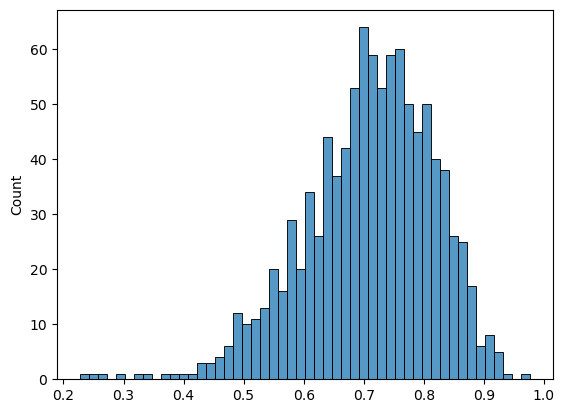

In [51]:
sns.histplot( gibbs_results['trans_mat_draws'][1000:,0,0], bins = 50)

In [6]:
gibbs_results.keys()

dict_keys(['emission_prior', 'emission_weight_draws', 'hidden_states_MLE', 'log_like_draws', 'trans_mat_draws', 'trans_mat_prior'])

In [11]:
gibbs_results['trans_mat_draws'] [50]

Array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int32, weak_type=True)

In [26]:
sample_emission_weights(true_hidden_states, obs_data, emission_prior, random.PRNGKey(0) ) . sum (axis=1)

Array([1.0000001, 1.       , 1.       ], dtype=float32)

In [22]:
sample_trans_mat?

Signature: sample_trans_mat(hidden_states, trans_mat_prior, key)
Docstring:
Samples a transition matrix from the conditional distribution given
a sequence of hidden states and a prior over transition matrices.

Args:
    hidden_states: An array of integers of shape `(n_samples,)` representing the
    sequence of hidden states.
    trans_mat_prior: A 2D array of shape `(n_states, n_states)` representing the
    prior over transition matrices. Each row of the matrix is a Dirichlet prior
    over the transitions from a given state.
    key: Optional `jax.random.PRNGKey`. If provided, used for random number generation.

Returns:
    A 2D array of shape `(n_states, n_states)` representing the sampled transition matrix.
File:      ~/Documents/HMMs/src_python/hmm_mcmc.py
Type:      function

In [27]:
sample_trans_mat(true_hidden_states, trans_mat_prior, random.PRNGKey(0))

Array([[0.3893561 , 0.44527414, 0.16536972],
       [0.46679705, 0.29935053, 0.23385243],
       [0.38239956, 0.5524928 , 0.06510768]], dtype=float32)

In [15]:
sample_trans_mat?

Signature: sample_trans_mat(hidden_states, trans_mat_prior, key)
Docstring:
Samples a transition matrix from the conditional distribution given
a sequence of hidden states and a prior over transition matrices.

Args:
    hidden_states: An array of integers of shape `(n_samples,)` representing the
    sequence of hidden states.
    trans_mat_prior: A 2D array of shape `(n_states, n_states)` representing the
    prior over transition matrices. Each row of the matrix is a Dirichlet prior
    over the transitions from a given state.
    key: Optional `jax.random.PRNGKey`. If provided, used for random number generation.

Returns:
    A 2D array of shape `(n_states, n_states)` representing the sampled transition matrix.
File:      ~/Documents/HMMs/src_python/hmm_mcmc.py
Type:      function

In [14]:
key = random.PRNGKey(seed)
prior_params = prior_set(num_states=num_states, single_trans_row_prior=jnp.full(num_states, 1),
                            single_emission_prior=jnp.full(num_bins, 1))
trans_mat_prior = prior_params['trans_mat_prior']
emission_prior = prior_params['emission_prior']
num_obs = len(obs_data)

key, subkey = random.split(key)
hidden_states_init = random.randint(subkey, (num_obs,), 0, num_states)

In [10]:
emission_prior.shape

(4, 3)

In [15]:
def prior_set(num_states, single_trans_row_prior, single_emission_prior):
    """
    Sets prior parameters for binned HMM sampling.
    
    Args:
    - num_states (int): number of hidden states in the HMM.
    - single_trans_row_prior (array): a 1D array of size num_states specifying the prior for each row of the transition matrix.
    - single_emission_prior (array): a 1D array of size num_bins specifying the prior for each emission probability vector. 
    
    Returns:
    - dict: a dictionary containing either trans_mat_prior and emission_prior or mix_weight_prior and emission_prior.
    """
    trans_mat_prior = jnp.tile(single_trans_row_prior, (1,num_states))
    
    emission_prior = jnp.transpose(jnp.tile(single_emission_prior, (1,num_states))) # num_states x num_bins

    return {"trans_mat_prior": trans_mat_prior, "emission_prior": emission_prior}

In [21]:
single_emission_prior=jnp.full(num_bins,1)

In [26]:
jnp.tile(single_emission_prior, (num_states,1) ) . shape

(3, 4)

In [22]:
single_emission_prior

Array([1, 1, 1, 1], dtype=int32, weak_type=True)

In [ ]:
def scan_fun(carry, _):
    key, hidden_states_prev, max_log_like_prev, hidden_states_MLE_prev = carry # Unpack the carry tuple

    key, subkey = random.split(key)
    trans_mat_draw = sample_trans_mat(hidden_states_prev, trans_mat_prior, subkey)

    key, subkey = random.split(key)
    emission_draw = sample_emission_weights(hidden_states_prev, obs_data, emission_prior, subkey)

    key, subkey = random.split(key)
    hidden_states_draw, log_like_draw = sample_hidden_states(obs_data, trans_mat_draw, emission_draw, subkey)

    hidden_states_MLE = jax.lax.cond(jax.lax.gt(log_like_draw,max_log_like_prev),
                                    lambda _: hidden_states_draw,
                                    lambda _: hidden_states_MLE_prev, operand=None)
    max_log_like = jax.lax.cond(jax.lax.gt(log_like_draw, max_log_like_prev),
                                lambda _: log_like_draw,
                                lambda _: max_log_like_prev, operand=None)
    
    return ((key, hidden_states_draw, max_log_like, hidden_states_MLE), (trans_mat_draw, emission_draw, log_like_draw))

key, subkey = random.split(key)
init_carry = (key, hidden_states_init, float('-inf'), hidden_states_init)
(final_carry, draws) = jax.lax.scan(scan_fun, init_carry, jnp.arange(num_its))
_, _, _, hidden_states_MLE = final_carry
trans_mat_draws, emission_draws, log_like_draws = zip(*draws)
